# Introduction to Image Processing

Code starts here

In [116]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage
from skimage.color import rgb2gray
from skimage import data, io, util # 'data' is for images, 'io' is for reading local images, and 'util' is for inverting image

# Display local image file using PIL

Type before conversion: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Type after conversion: <class 'numpy.ndarray'>
Shape of image (rows, cols, channels) (768, 1366, 3)


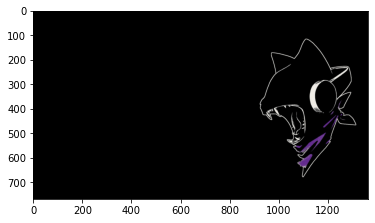

In [111]:
imgPIL=Image.open('default.jpg')
imgPIL.load()
imgNP = np.asarray( imgPIL, dtype="uint8" ) # Can be "uint32" , uint8 means image contains 256 colors
plt.imshow(imgNP)
print('Type before conversion:', type(imgPIL))
print('Type after conversion:', type(imgNP))
print('Shape of image (rows, cols, channels)', imgNP.shape)

# Display online image

(720, 1280, 3)

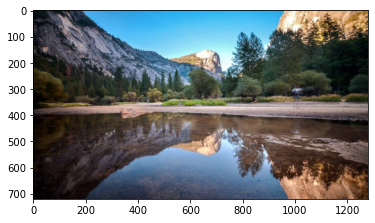

In [115]:
img=io.imread('https://i.ytimg.com/vi/NlSRMYHUZUs/maxresdefault.jpg')
plt.imshow(img)
img.shape

# Display image from skimage -> data._________()

(512, 512, 3)


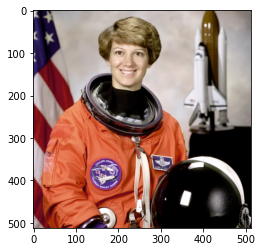

In [4]:
imgSK=data.astronaut()
print(imgSK.shape) # skimage -> data are one channelled images i.e. Only contains sequences of one color with white
type(imgSK)
plt.imshow(imgSK)

# Display local image using skimage -> io

(1059, 1571, 3)

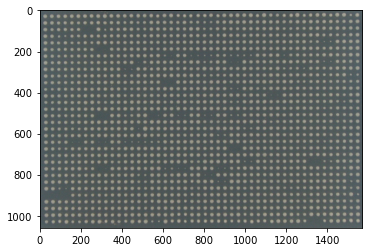

In [113]:
imgSKIO=io.imread('yeast_colony_array.jpg')
plt.imshow(imgSKIO)
imgSKIO.shape

# Dividing the channels

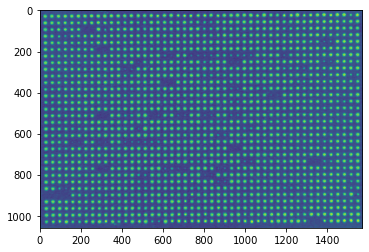

In [6]:
plt.imshow(imgSKIO[:,:,0]) # 0 for red, 1 for green and 2 for blue. The three images might look like the same

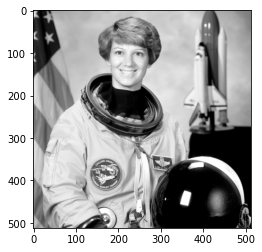

In [7]:
plt.imshow(imgSK[:,:,0], 'gray') # 0 -> RED. Here's a better view

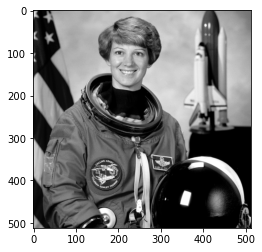

In [8]:
plt.imshow(imgSK[:,:,1], 'gray') # 1 -> GREEN

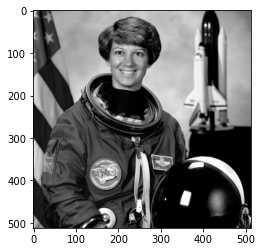

In [9]:
plt.imshow(imgSK[:,:,2], 'gray') # 2 -> BLUE

# Image Manipulation : Basic

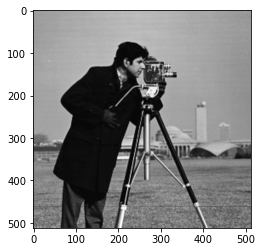

In [10]:
imgManip=data.camera() # Assigning image to imgManip
plt.imshow(imgManip, 'gray')

In [11]:
imgManip[30,30] # Extracting pixel values in a location

162

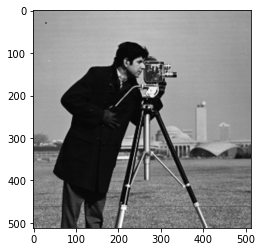

In [12]:
imgManip[29,29]=0
imgManip[29,30]=0
imgManip[29,31]=0
imgManip[30,29]=0
imgManip[30,30]=0
imgManip[30,31]=0
imgManip[31,29]=0
imgManip[31,30]=0
imgManip[31,31]=0
plt.imshow(imgManip, 'gray')  # Now a dot might be visible in the image (Look closer!)

# Image Manipulation : Applying ranges in pixels

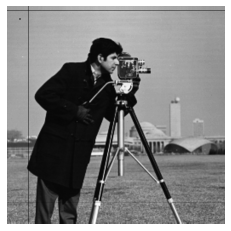

In [13]:
# imgManip[row, col]
imgManip[:,50]=0 # Applying to all rows
imgManip[10,:]=0 # Applying to all columns
plt.imshow(imgManip, 'gray') # Visible black lines
plt.axis('off');

In the cell below, imgManip[150:200,375:425]=0, it's (kind of) format/syntax can be described as:

<br>

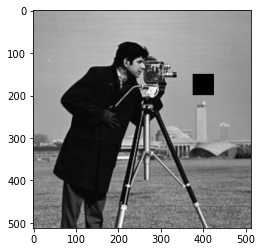

In [14]:
imgManip=data.camera() # Reinitializing image due to many changes in previous cells
imgManip[150:200,375:425]=0 # [row, col] or [vertical_control, horizontal control]
plt.imshow(imgManip, 'gray') # Showing black rectangle/square in front of the camera

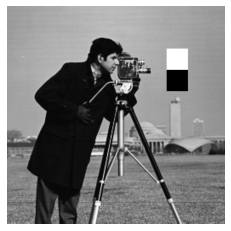

In [15]:
imgManip[100:150,375:425]=255 # Displaying a white rectangle on top of black rectangle
plt.imshow(imgManip, 'gray')
plt.axis('off');

# Image Manipulation : Masking on skimage -> data images. I would like to say 'Conditional Masking' 
Just a numpy array containing some true and false based on some conditions

NOTE: Reapplying masking might require restarting kernel and re-run

[[[ True  True  True]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[ True  True  True]
  [ True  True  True]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True False False]
  [False False False]
  [False False False]]

 ...

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [False False False]
  [False False False]
  [False False False]]]


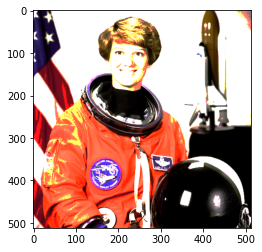

In [16]:
mask=imgSK >= 128
imgSK[mask]=255
print(mask)
plt.imshow(imgSK, 'gray') # As current image is of 3 channels, so it cannot be converted to gray by this method

Multiple Masking on Astronaut Image

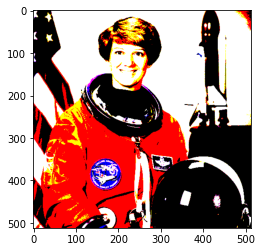

In [17]:
imgSK=data.astronaut()
maskWhite=imgSK >= 128
maskBlack=imgSK < 128
imgSK[maskBlack] = 0
imgSK[maskWhite] = 255
plt.imshow(imgSK)

Multiple Masking on Camera Image (A more clear example)

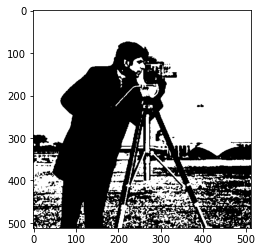

In [18]:
threshold=128
imgSK=data.camera()
maskWhite=imgSK >= threshold
maskBlack=imgSK < threshold
imgSK[maskBlack] = 0
imgSK[maskWhite] = 255
plt.imshow(imgSK, 'gray')

# Image Manipulation : Manipulating color(s) at specific pixels

(300, 451, 3)


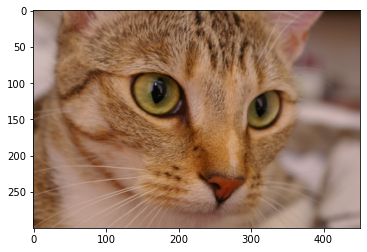

In [19]:
imgManip=data.chelsea() # Changing image for manipulation
print(imgManip.shape) # Constains 3 channels
plt.imshow(imgManip)

In [20]:
imgManip[100,100] #Looking at what each pixel in the image stores i.e. each pixel stores combination of rgb colors

array([161, 113,  67], dtype=uint8)

In [21]:
imgManip[100,100]=[255,0,0] #shows red dot (Might not be visible clearly)

Now, showing a bit bigger dot

Look closely in cat's eye...!

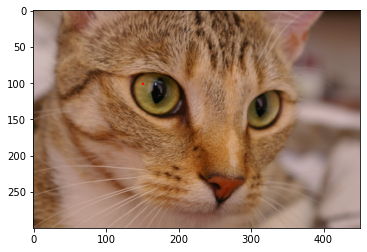

In [22]:
locX=100
locY=150
imgManip[locX,locY]=[255,0,0]
imgManip[locX,locY+1]=[255,0,0]
imgManip[locX,locY+2]=[255,0,0]
imgManip[locX+1,locY]=[255,0,0]
imgManip[locX+1,locY+1]=[255,0,0]
imgManip[locX+1,locY+2]=[255,0,0]
imgManip[locX+2,locY]=[255,0,0]
imgManip[locX+2,locY+1]=[255,0,0]
imgManip[locX+2,locY+2]=[255,0,0]
plt.imshow(imgManip)

# Image Manipulation : Masking + Color Manipulation

Select the pixels with red color value greater than 160 and replace those pixels with pure red color

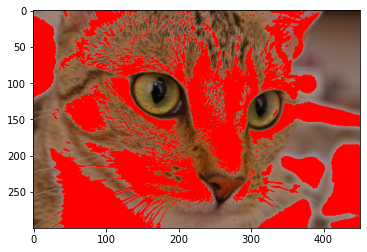

In [23]:
imgManip=data.chelsea()
mask=imgManip[:,:,0] > 160 # [locX, locY, channel_num] where locX and locY are coordinates of a pixel.
# I'm currently selecting the red channel
imgManip[mask]=[255,0,0] # [red, green, blue]
plt.imshow(imgManip)

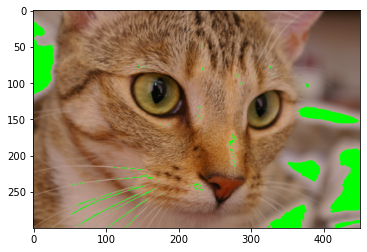

In [24]:
imgManip=data.chelsea()
mask=imgManip[:,:,1] > 160 # [locX, locY, channel_num] where locX and locY are coordinates of a pixel.
# I'm currently selecting the green channel
imgManip[mask]=[0,255,0] # [red, green, blue]
plt.imshow(imgManip)

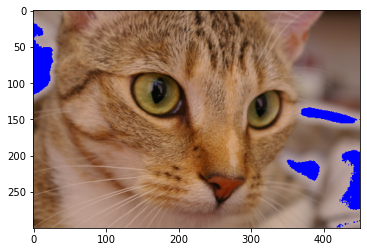

In [25]:
imgManip=data.chelsea()
mask=imgManip[:,:,2] > 160 # [locX, locY, channel_num] where locX and locY are coordinates of a pixel.
# I'm currently selecting the blue channel
imgManip[mask]=[0,0,255] # [red, green, blue]
plt.imshow(imgManip)

Here, I'm extracting specific channel from 3 channeled cat image. (She looks so cute in gray image...! 😻)

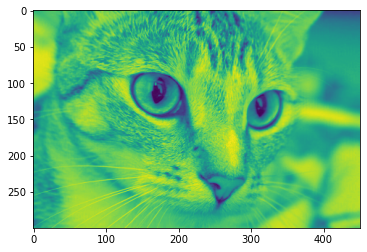

In [35]:
imgManip=data.chelsea()
newImg=imgManip[:,:,0]
plt.imshow(newImg)

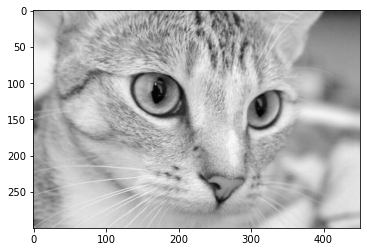

In [36]:
plt.imshow(newImg, 'gray')

# Image Manipulation : Reversing RGB to BGR
Well, this might not be useful, but it might be fun to reverse the color scales. Remember, it just swaps the color values of Blue and Red channel

Before -> R 147.67308943089432 : G 111.44447893569844 : B 86.79785661492978
After -> R 86.79785661492978 : G 111.44447893569844 : B 147.67308943089432


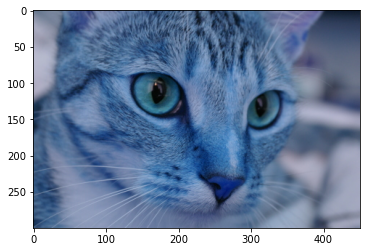

In [45]:
imgManip=data.chelsea()
bgr_img=imgManip[:,:,::-1]
plt.imshow(bgr_img)
print('Before -> R',imgManip[:,:,0].mean(),': G',imgManip[:,:,1].mean(),': B',imgManip[:,:,2].mean())
print('After -> R',bgr_img[:,:,0].mean(),': G',bgr_img[:,:,1].mean(),': B',bgr_img[:,:,2].mean())

# Image Manipulation : Invert an image

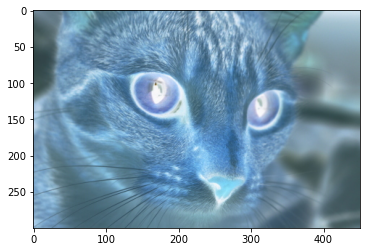

In [47]:
imgManip=data.chelsea()
invert_cat=util.invert(imgManip)
plt.imshow(invert_cat)

SCIENCE BEHIND INVERTED IMAGE:

Just subtract current pixel value from 255 (or max image color range) and You'll have the invert image. You can observe that from next two cells

In [48]:
invert_cat[0,:10,0]

array([112, 112, 114, 114, 114, 114, 114, 112, 111, 110], dtype=uint8)

In [49]:
imgManip[0,:10,0]

array([143, 143, 141, 141, 141, 141, 141, 143, 144, 145], dtype=uint8)

<br>

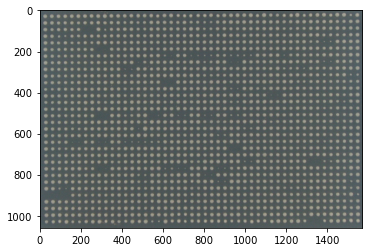

In [50]:
plt.imshow(imgSKIO)

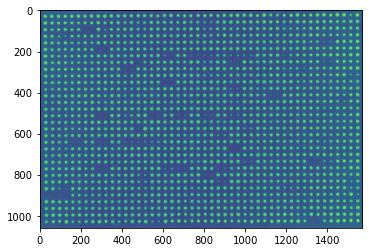

In [63]:
plt.imshow(imgSKIO[:,:,1])

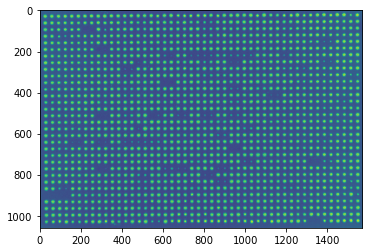

In [88]:
imgSKIO_gray=rgb2gray(imgSKIO) # On using rgb2gray, imgSKIO_gray will not have uint8 version of image
plt.imshow(imgSKIO_gray)

# Image Manipulation : Making Histograms
Graphical representation of numerical data distribution

Making Histograms might help us in finding out dominant color in any image

img.ravel() Down 👇 here flattens the multi-dimensional array to 1-D array so we can get all values of pixels in 1-Dimensional vector.

For more info: https://numpy.org/devdocs/reference/generated/numpy.ravel.html

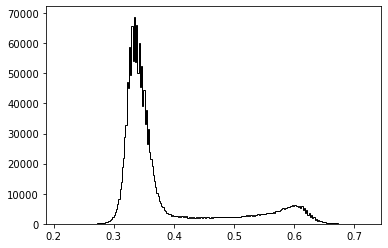

In [89]:
plt.hist(imgSKIO_gray.ravel(), bins=256, histtype='step', color='black');

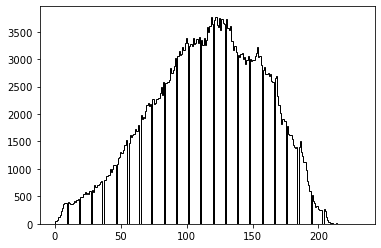

In [85]:
imgManip=data.chelsea() # Cat's image
plt.hist(imgManip.ravel(), bins=256, histtype='step', color='black');

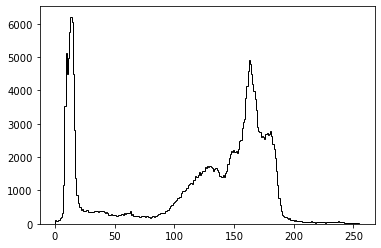

In [87]:
imgManip=data.camera()
plt.hist(imgManip.ravel(), bins=256, histtype='step', color='black');

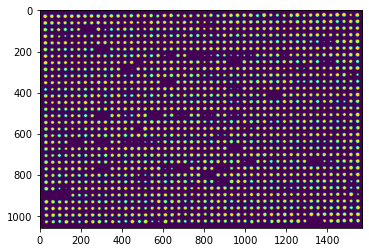

In [95]:
plt.imshow(imgSKIO_gray>0.5)

# Problem : Finding colonies using segmentation
The image imgSKIO contains bacterial colonies that we have to count. (We can do other things too using segmentation)

(There might be no clear instructions on what am I doing in next cells, well... I'm still trying to understand this...)

In [98]:
from skimage.filters import sobel # sobel filer detects boundaries of objects in 1-D image
from skimage.morphology import watershed

Watershed apportions pixels into marked basins. The algorithm uses a priority queue to hold the pixels with the metric for the priority queue being pixel value, then the time of entry into the queue - this settles ties in favor of the closest marker. ~ <a href="https://scikit-image.org/docs/0.7.0/api/skimage.morphology.watershed.html">Scikit</a>

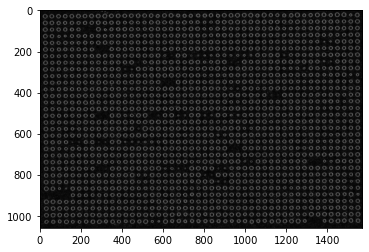

In [103]:
elevation=sobel(imgSKIO_gray)
plt.imshow(elevation, 'gray')

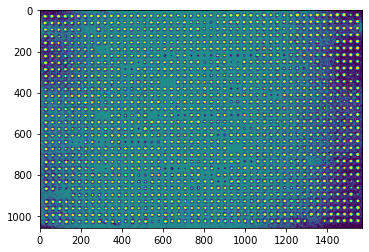

In [105]:
masks=np.zeros_like(imgSKIO_gray)
masks[imgSKIO_gray<0.35]=1
masks[imgSKIO_gray>0.55]=2
plt.imshow(masks)

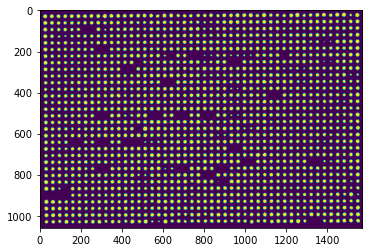

In [107]:
segmentation=watershed(elevation, masks)
segmentation[segmentation==1]=0
plt.imshow(segmentation)

In [109]:
from scipy import ndimage as ndi
labeled, number=ndi.label(segmentation)
print('Number of colonies:',number)

Number of colonies: 1481


# Short descriptions of Libraries

skimage -> For Segmentation, Geometric trans, Color_space manip, Analysis, Filtering, Morphology, Feature Detection

scipy -> Common img operations -> Reading, Segmentation, Convolution, Face detection, Feature Extraction

PIL -> Reading, Rescaling, Saving, Image Archives, Image display

numpy -> Image masking, cropping, manipulating pixel values

cv2 -> OpenCV -> Computer vision

pgmagick -> Resizing, Rotation, Sharpening, Gradient images, drawing text